In [1]:
#testing galaxy related functions
#for bgal, shotnoise and magnification bias

In [1]:
%matplotlib inline

from __future__ import division
import os
import sys
from scipy import integrate, optimize
from scipy.interpolate import interp2d, interp1d

import numpy as np
from numpy import pi,sin,cos,tan,e,arctan,arcsin,arccos,sqrt
from numpy.random import randn
import matplotlib
import matplotlib.pyplot as P
from time import clock


matplotlib.rcParams['figure.figsize'] = (7, 5)
P.rcParams['text.usetex'] = True  # not really needed
P.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
P.rcParams["font.size"] = 24
P.rc('xtick', labelsize=18) 
P.rc('ytick', labelsize=18)
# P.rc('xtick', labelsize=20) 
# P.rc('ytick', labelsize=20)
np.set_printoptions(threshold=np.nan)

from mpl_toolkits.mplot3d import axes3d



# sys.path.append("/Users/amadeus/Documents/10.semester/ma")
# from magmod import P_cdm_BBKS, D_z, rCom, H_0, c, H_z, E_z, Omega_m, W_tophat, T_obs, nutoz21, h
# from magmod import P_cdm_BBKS, D_z, rCom, H_0, c, H_z, E_z, Omega_m, T_obs, nutoz21, h
from magmod import bgal_new, sg, bgal, shotnoise, nofz, zbg_max
from magbias_experiments import LSST, SKA2



#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$ 
Rescaling the galaxy number density by a factor of 104185.986576 to match the gold sample with 6330073646.61 total galaxies 
#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$ 



In [2]:
# shotnoise(z, dz, galsurv, MAXMAG = False, NINT = 2000)

In [3]:
ztab = np.linspace(0.01, 3.9, 200)
mtab = np.array([23,25,27])

In [13]:
m = 27

bnewtab = np.array( [bgal_new(zz, m) for zz in ztab] )
btab = bgal(ztab)
ntab = nofz(ztab, m)
# nbehindtab = np.array([ngal_behind(zz, m) for zz in ztab])


Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non d

In [14]:
zbgmax = zbg_max(m, LSST, THRESHOLD = 1e-12)
print zbgmax

3.9


(1e-12, 10000000000.0)

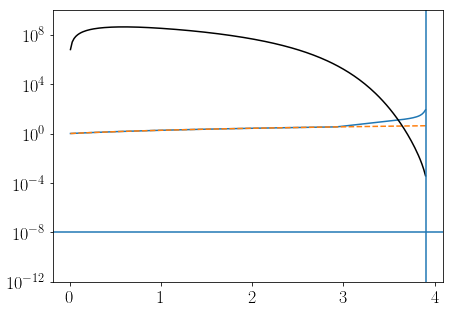

In [15]:
fig = P.figure(); ax=fig.add_subplot(111);
ax.semilogy(ztab, bnewtab)
ax.semilogy(ztab, btab, ls = "--")
ax.semilogy(ztab, ntab, c="black")
ax.axhline((1e-8))
ax.axvline(zbgmax)
ax.set_ylim((1e-12,1e10))